(array([42., 49., 63., 69., 30.,  0.,  1.,  1.,  0.,  1.]),
 array([   0.,  102.,  204.,  306.,  408.,  510.,  612.,  714.,  816.,
         918., 1020.]),
 <BarContainer object of 10 artists>)

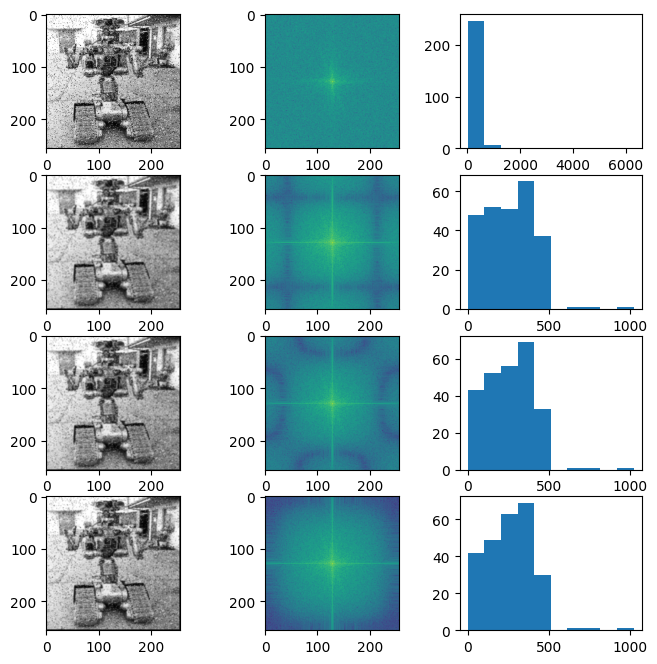

In [67]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

cv05_robotS = cv2.imread("cv05_robotS.bmp")
cv05_PSS = cv2.imread("cv05_PSS.bmp")

def D2_DFT(image):
    # 2D Discrete Fourier Transform
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fft2= np.fft.fft2(image)
    # shift zero-frequency component to the center of the spectrum
    fft2_shift= np.fft.fftshift(fft2)
    return fft2_shift, fft2

def apply_simple_average_filter(image, h):
    """
    Metoda prostého průměrování na obrazu.

    :param image: vstupní obraz
    :param kernel_size: velikost jádra filtru
    :return: obraz s aplikovaným filtrem
    """
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Inicializace výstupního obrazu
    filtered_image = np.zeros_like(image)    
    
    # Výpočet poloviny jádra filtru
    s = h.shape[0] // 2
    
    # Procházení všech pixelů obrazu
    for i in range(s, image.shape[0] - s):
        for j in range(s, image.shape[1] - s):
            # Výpočet nového pixelu
            filtered_image[i, j] = np.sum(image[(i - s):(i + s + 1), (j - s):(j + s + 1)]*h)
    
    return filtered_image
    
h1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
h2 = np.array([[1, 1, 1], [1, 2, 1], [1, 1, 1]])/10
h3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16

plt.figure(figsize=(8, 8))
plt.subplot(4, 3, 1)
plt.imshow(cv05_robotS, cmap="gray")
plt.subplot(4, 3, 2)
plt.imshow(np.log(np.abs(D2_DFT(cv2.cvtColor(cv05_robotS, cv2.COLOR_RGB2GRAY))[0])))
#histogram
plt.subplot(4, 3, 3)
plt.hist(cv2.calcHist([cv2.cvtColor(cv05_robotS, cv2.COLOR_RGB2GRAY)], [0], None, [256], [0, 256]))

plt.subplot(4, 3, 4)
cv05_robotS_filtered1 = apply_simple_average_filter(cv05_robotS, h1)
plt.imshow(cv05_robotS_filtered1, cmap="gray")
plt.subplot(4, 3, 5)
plt.imshow(np.log(np.abs(D2_DFT(cv05_robotS_filtered1)[0])))
#histogram
plt.subplot(4, 3, 6)
plt.hist(cv2.calcHist([cv05_robotS_filtered1], [0], None, [256], [0, 256]))

plt.subplot(4, 3, 7)
cv05_robotS_filtered2 = apply_simple_average_filter(cv05_robotS, h2)
plt.imshow(cv05_robotS_filtered2, cmap="gray")
plt.subplot(4, 3, 8)
plt.imshow(np.log(np.abs(D2_DFT(cv05_robotS_filtered2)[0])))
plt.subplot(4, 3, 9)
plt.hist(cv2.calcHist([cv05_robotS_filtered2], [0], None, [256], [0, 256]))

plt.subplot(4, 3, 10)
cv05_robotS_filtered3 = apply_simple_average_filter(cv05_robotS, h3)
plt.imshow(cv05_robotS_filtered3, cmap="gray")
plt.subplot(4, 3, 11)
plt.imshow(np.log(np.abs(D2_DFT(cv05_robotS_filtered3)[0])))
#histogram
plt.subplot(4, 3, 12)
plt.hist(cv2.calcHist([cv05_robotS_filtered3], [0], None, [256], [0, 256]))


<Axes: >

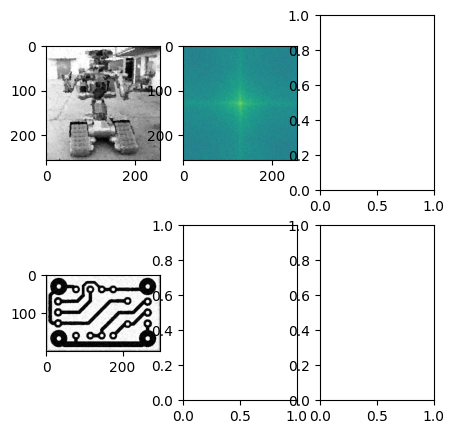

In [49]:
def rotate_mask_method(image):
    """
    Metoda rotující masky.

    """
    h = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9

    # Prevod obrazu na stupnice sedi
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Inicializace výstupního obrazu
    filtered_image = np.zeros_like(gray)

    temp_img = np.zeros((gray.shape[0]+4, gray.shape[1]+4))
    temp_img[2:-2, 2:-2] = gray

    filtered_image = np.zeros_like(gray)
    for i in range(2, temp_img.shape[0]-2):
        for j in range(2, temp_img.shape[1]-2):
            mask1 = temp_img[i-2:i+1, j-2:j+1]
            mask2 = temp_img[i-1:i+2, j-2:j+1]
            mask3 = temp_img[i:i+3, j-2:j+1]

            mask4 = temp_img[i-2:i+1, j:j+3]
            mask5 = temp_img[i-1:i+2, j:j+3]
            mask6 = temp_img[i:i+3, j:j+3]

            mask7 = temp_img[i-2:i+1, j-1:j+2]
            mask8 = temp_img[i:i+3, j-1:j+2]

            masks = [mask1, mask2, mask3, mask4, mask5, mask6, mask7, mask8]

            vars_arr = []
            for mask in masks:
                vars_arr.append(np.var(mask))

            min_var = np.argmin(vars_arr)

            filtered_image[i-2, j-2] = np.mean(masks[min_var])
    return filtered_image


plt.figure(figsize=(5, 5))
cv05_robotS_rmask = rotate_mask_method(cv05_robotS)
plt.subplot(2, 3, 1)
plt.imshow(cv05_robotS_rmask, cmap="gray")

plt.subplot(2, 3, 2)
plt.imshow(np.log(np.abs(D2_DFT(cv05_robotS_rmask)[0])))

plt.subplot(2, 3, 3)
plt.hist(np.histogram(cv05_robotS_rmask[0], 255, (0, 255)))

cv05_PSS = cv2.imread("cv05_PSS.bmp")
cv05_PSS_rmask = rotate_mask_method(cv05_PSS)
plt.subplot(2, 3, 4)
plt.imshow(cv05_PSS_rmask, cmap="gray")

plt.subplot(2, 3, 5)
# plt.imshow(np.log(np.abs(D2_DFT(cv05_PSS_rmask)[0]))

plt.subplot(2, 3, 6)
# plt.imshow(np.histogram(cv05_robotS_rmask[0], 255, (0, 255)))


In [70]:
def simple_median_filter(image, h):
    """
    Metoda prostého průměrování na obrazu.

    :param image: vstupní obraz
    :param kernel_size: velikost jádra filtru
    :return: obraz s aplikovaným filtrem
    """
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Inicializace výstupního obrazu
    filtered_image = np.zeros_like(image)

    # Výpočet poloviny jádra filtru
    s = h.shape[0] // 2

    # Procházení všech pixelů obrazu
    for i in range(s, image.shape[0] - s):
        for j in range(s, image.shape[1] - s):
            # Výpočet nového pixelu
            filtered_image[i, j] = np.median(
                image[(i - s):(i + s + 1), (j - s):(j + s + 1)])

    return filtered_image


plt.figure(figsize=(10, 5))
# original
plt.subplot(2, 3, 1)
cv05_robotS_simple = simple_median_filter(cv05_robotS, np.ones((3, 3)))
plt.imshow(cv05_robotS_simple, cmap="gray")

# spectre
plt.subplot(2, 3, 2)
plt.imshow(np.log(np.abs(D2_DFT(cv05_robotS_simple)[0])))

# histogram
plt.subplot(2, 3, 3)
plt.hist(cv2.calcHist([cv05_robotS_simple], [0], None, [256], [0, 256]))

cv05_PSS_simple = simple_median_filter(cv05_PSS, np.ones((3, 3)))
# original
plt.subplot(2, 3, 4)
plt.imshow(cv05_PSS_simple, cmap="gray")

# spectre
plt.subplot(2, 3, 5)
plt.imshow(np.log(np.abs(D2_DFT(cv05_PSS_simple)[0])))

# histogram
plt.subplot(2, 3, 6)
plt.hist(cv2.calcHist([cv05_PSS_simple], [0], None, [256], [0, 256]))
